In [1]:
import pandas as pd


pd.set_option("display.max_columns", None)

In [2]:
treated_air_quality_dataset = "data/air_quality_dataset_treated.parquet"

df = pd.read_parquet(treated_air_quality_dataset)

In [3]:
df

,sitename,aqi,status,so2,co,o3,o3_8hr,pm10,pm2.5,no2,nox,no,windspeed,winddirec,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,year,month,day,hour,minute,day_of_week,is_weekend,county_Changhua County,county_Chiayi City,county_Chiayi County,county_Hsinchu City,county_Hsinchu County,county_Hualien County,county_Kaohsiung City,county_Keelung City,county_Kinmen County,county_Lienchiang County,county_Miaoli County,county_Nantou County,county_New Taipei City,county_Penghu County,county_Pingtung County,county_Taichung City,county_Tainan City,county_Taipei City,county_Taitung County,county_Taoyuan City,county_Yilan County,county_Yunlin County
0,0.872882,62.0,2,0.9,0.17,35.0,40.2,18.0,17.0,2.3,2.6,0.3,2.3,225.0,0.2,20.1,26.0,1.0,121.038869,24.900097,2024,8,31,23,0,5,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.075950,50.0,0,1.6,0.32,27.9,35.1,27.0,14.0,7.6,9.3,1.6,1.1,184.0,0.2,15.3,23.0,1.0,120.641092,24.151958,2024,8,31,23,0,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.725856,45.0,0,0.4,0.17,25.1,40.6,21.0,13.0,2.9,4.1,1.1,0.4,210.0,0.2,13.8,24.0,0.0,121.088955,24.740914,2024,8,31,23,0,5,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.846635,42.0,0,0.8,0.20,30.0,35.9,19.0,10.0,4.0,4.8,0.7,1.9,239.0,0.2,13.0,26.0,1.0,120.972368,24.805636,2024,8,31,23,0,5,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.851988,50.0,0,1.0,0.16,33.5,35.9,18.0,14.0,1.8,3.1,1.2,1.8,259.0,0.1,15.3,28.0,1.0,120.898693,24.696907,2024,8,31,23,0,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4601500,1.481261,35.0,0,2.1,0.08,34.0,30.0,28.0,7.0,3.3,4.3,1.0,4.0,297.0,0.1,11.0,28.0,2.0,121.481028,25.068950,2017,9,28,15,0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4601501,1.499732,29.0,0,2.4,0.13,27.0,25.0,17.0,6.0,4.0,6.2,2.2,3.3,274.0,0.2,9.0,20.0,2.0,121.516664,25.103340,2017,9,28,15,0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4601502,1.261140,78.0,2,5.4,0.15,59.0,47.0,36.0,24.0,7.1,8.3,1.2,1.2,298.0,0.2,27.0,38.0,5.0,120.312017,22.608711,2017,9,28,15,0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4601503,0.708694,99.0,2,3.3,0.27,67.0,59.0,52.0,32.0,13.0,14.0,1.7,2.6,347.0,0.6,35.0,59.0,3.0,120.312017,22.608711,2017,9,28,15,0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
X = df.drop(['status'], axis = 1)
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss', use_label_encoder=False)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

d:\anaconda\envs\ml-project\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:00:55] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [10]:
acc

0.9989242649959089

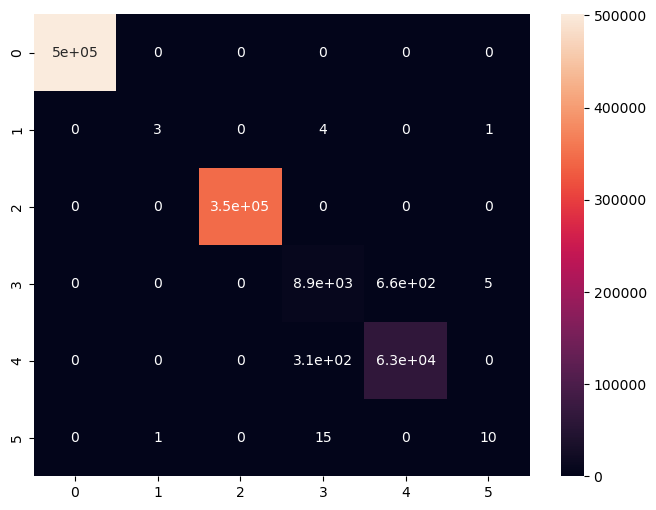

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    501254
           1       0.75      0.38      0.50         8
           2       1.00      1.00      1.00    346050
           3       0.96      0.93      0.95      9560
           4       0.99      1.00      0.99     63403
           5       0.62      0.38      0.48        26

    accuracy                           1.00    920301
   macro avg       0.89      0.78      0.82    920301
weighted avg       1.00      1.00      1.00    920301



In [12]:
grid = {
    'n_estimators':[50, 100, 150],
    'max_depth':[3, 4, 5],
    'learning_rate':[0.01, 0.1, 0.2],
    'subsample':[0.7, 0.8, 1.0],
    'colsample_bytree':[0.7, 0.8, 1.0],
    'gamma':[0, 0.1, 0.2]
}

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=grid, scoring='accuracy', cv=5, verbose=1, n_jobs=1)

grid_search.fit(X_train, y_train)

print("Hiperparâmetros: ", grid_search.best_params_)

In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [ ]:
new_acc = accuracy_score(y_test, y_pred)
new_acc

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))